In [1]:
!pip install yfinance --quiet

     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf

In [3]:
df = yf.download('^NSEI', start="1998-01-01", end="2021-12-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [5]:
df.shape

(3476, 6)

In [6]:
df['MA200'] = df['Adj Close'].rolling(window=200).mean()

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,NaN
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,NaN
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,NaN
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,NaN
...,...,...,...,...,...,...,...
2021-11-24,17550.050781,17600.599609,17354.000000,17415.050781,17415.050781,298100,16055.276733
2021-11-25,17417.300781,17564.349609,17351.699219,17536.250000,17536.250000,255900,16069.718735
2021-11-26,17338.750000,17355.400391,16985.699219,17026.449219,17026.449219,356300,16080.901230


In [8]:
df = df.dropna()

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0,5210.716744
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246
...,...,...,...,...,...,...,...
2021-11-24,17550.050781,17600.599609,17354.000000,17415.050781,17415.050781,298100,16055.276733
2021-11-25,17417.300781,17564.349609,17351.699219,17536.250000,17536.250000,255900,16069.718735
2021-11-26,17338.750000,17355.400391,16985.699219,17026.449219,17026.449219,356300,16080.901230


##1st Condition : S&P 500 is above 200 days Moving Average

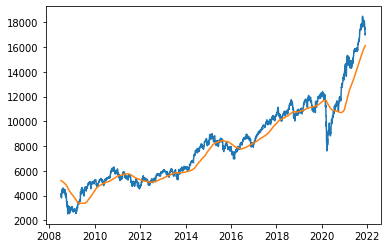

In [10]:
import matplotlib.pyplot as plt

plt.plot(df['Adj Close'])
plt.plot(df['MA200'])
plt.show()

In [11]:
df['price change'] = df['Adj Close'].pct_change()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change
Date,,,,,,,,
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0,5210.716744,NaN
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245,-0.010285
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745,0.042258
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995,0.001227
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246,-0.027197
...,...,...,...,...,...,...,...,...
2021-11-24,17550.050781,17600.599609,17354.000000,17415.050781,17415.050781,298100,16055.276733,-0.005045
2021-11-25,17417.300781,17564.349609,17351.699219,17536.250000,17536.250000,255900,16069.718735,0.006959
2021-11-26,17338.750000,17355.400391,16985.699219,17026.449219,17026.449219,356300,16080.901230,-0.029071


In [13]:
df = df.dropna()

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change
Date,,,,,,,,
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245,-0.010285
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745,0.042258
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995,0.001227
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246,-0.027197
2008-07-14,4047.449951,4118.100098,4004.250000,4039.699951,4039.699951,0,5195.907997,-0.002297
...,...,...,...,...,...,...,...,...
2021-11-24,17550.050781,17600.599609,17354.000000,17415.050781,17415.050781,298100,16055.276733,-0.005045
2021-11-25,17417.300781,17564.349609,17351.699219,17536.250000,17536.250000,255900,16069.718735,0.006959
2021-11-26,17338.750000,17355.400391,16985.699219,17026.449219,17026.449219,356300,16080.901230,-0.029071


In [15]:
df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df['avg Up'] = df['Upmove'].ewm(span=19).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df['avg Down'] = df['Downmove'].ewm(span=19).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df = df.dropna()

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down
Date,,,,,,,,,,,,
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245,-0.010285,0.000000,0.010285,0.000000,0.010285
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745,0.042258,0.042258,0.000000,0.022241,0.004872
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995,0.001227,0.001227,0.000000,0.014487,0.003074
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246,-0.027197,0.000000,0.027197,0.010274,0.010089
2008-07-14,4047.449951,4118.100098,4004.250000,4039.699951,4039.699951,0,5195.907997,-0.002297,0.000000,0.002297,0.007765,0.008186
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,17550.050781,17600.599609,17354.000000,17415.050781,17415.050781,298100,16055.276733,-0.005045,0.000000,0.005045,0.002267,0.004787
2021-11-25,17417.300781,17564.349609,17351.699219,17536.250000,17536.250000,255900,16069.718735,0.006959,0.006959,0.000000,0.002736,0.004308
2021-11-26,17338.750000,17355.400391,16985.699219,17026.449219,17026.449219,356300,16080.901230,-0.029071,0.000000,0.029071,0.002462,0.006785


In [21]:
df['RS'] = df['avg Up']/df['avg Down']

In [22]:
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))

In [23]:
df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'

In [24]:
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'

In [25]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245,-0.010285,0.000000,0.010285,0.000000,0.010285,0.000000,0.000000,No
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745,0.042258,0.042258,0.000000,0.022241,0.004872,4.565122,82.030941,No
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995,0.001227,0.001227,0.000000,0.014487,0.003074,4.712381,82.494166,No
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246,-0.027197,0.000000,0.027197,0.010274,0.010089,1.018397,50.455743,No
2008-07-14,4047.449951,4118.100098,4004.250000,4039.699951,4039.699951,0,5195.907997,-0.002297,0.000000,0.002297,0.007765,0.008186,0.948620,48.681621,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,17550.050781,17600.599609,17354.000000,17415.050781,17415.050781,298100,16055.276733,-0.005045,0.000000,0.005045,0.002267,0.004787,0.473518,32.135200,No
2021-11-25,17417.300781,17564.349609,17351.699219,17536.250000,17536.250000,255900,16069.718735,0.006959,0.006959,0.000000,0.002736,0.004308,0.635058,38.840083,No
2021-11-26,17338.750000,17355.400391,16985.699219,17026.449219,17026.449219,356300,16080.901230,-0.029071,0.000000,0.029071,0.002462,0.006785,0.362939,26.629126,Yes


In [26]:
PnL = []

for i in range(len(df) - 12):
  if "Yes" in df['Buy'].iloc[i]:
    for j in range(1,11):
      if df['RSI'].iloc[i + j] > 40:
        PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
        break
      if df['RSI'].iloc[i+j] < 40:
        PnL.append(df['Open'].iloc[i+12] - df['Open'].iloc[i+1])
        break


In [27]:
PnL

[307.85009765625,
 349.25,
 476.650390625,
 -241.5498046875,
 -251.25,
 -35.10009765625,
 -64.35009765625,
 -23.39990234375,
 7.25,
 56.2998046875,
 114.19970703125,
 163.14990234375,
 138.75,
 -42.650390625,
 50.7001953125,
 -179.25,
 -252.099609375,
 -109.4501953125,
 61.05029296875,
 114.2998046875,
 154.7998046875,
 93.94970703125,
 -93.0498046875,
 -123.7998046875,
 179.5498046875,
 104.0498046875,
 366.75,
 186.39990234375,
 302.0498046875,
 136.6494140625,
 -484.5498046875,
 149.9501953125,
 471.0,
 135.0,
 -199.1005859375,
 8.0498046875,
 -247.4501953125,
 -800.150390625,
 -242.2001953125,
 -348.8505859375,
 699.6494140625,
 754.1494140625,
 819.4501953125,
 -414.150390625,
 -423.25,
 -202.5,
 -108.0498046875,
 -304.25,
 -170.0498046875,
 219.599609375,
 1024.25,
 722.5]

In [28]:
len([i for i in PnL if i > 0])

29

In [29]:
len(PnL)

52

In [30]:
winning_rate = len([i for i in PnL if i > 0])/len(PnL)

winning_rate

0.5576923076923077